# Subsetting and Descriptive Stats

## Before your start:
   - Remember that you just need to do one of the challenges.
   - Keep in mind that you need to use some of the functions you learned in the previous lessons.
   - All datasets are provided in IronHack's database.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly: enjoy the process!
   
#### Import all the necessary libraries here:

In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

# [ONLY ONE MANDATORY] Challenge 1
#### In this challenge we will use the `Temp_States`  dataset. 

#### First import it into a dataframe called `temp`.

In [15]:
temp = pd.read_csv('Temp_States.csv')

#### Print `temp`.

In [16]:
print(temp)

         City        State  Temperature
0         NYC     New York    19.444444
1      Albany     New York     9.444444
2     Buffalo     New York     3.333333
3    Hartford  Connecticut    17.222222
4  Bridgeport  Connecticut    14.444444
5      Treton   New Jersey    22.222222
6      Newark   New Jersey    20.000000


#### Explore the data types of the *temp* dataframe. What types of data do we have? Comment your result.

In [13]:
temp.dtypes

City            object
State           object
Temperature    float64
dtype: object

In [ ]:
"""
City and State are objects, Temperature is a float. 
"""

#### Select the rows where state is New York.

In [28]:
cities_new_york = temp.loc[temp['State'] == 'New York']

#### What is the average temperature of cities in New York?

In [29]:
cities_new_york['Temperature'].mean()

10.74074074074074

#### Which states and cities have a temperature above 15 degrees Celsius?

In [41]:
temp_plus_15 = temp.loc[temp['Temperature'] > 15.0]
temp_plus_15

,City,State,Temperature
0,NYC,New York,19.444444
3,Hartford,Connecticut,17.222222
5,Treton,New Jersey,22.222222
6,Newark,New Jersey,20.000000


#### Now, return only the cities that have a temperature above 15 degrees Celsius.

In [42]:
temp_plus_15['City']

0         NYC
3    Hartford
5      Treton
6      Newark
Name: City, dtype: object

#### Which cities have a temperature above 15 degrees Celcius and below 20 degrees Celsius?

**Hint**: First, write the condition. Then, select the rows.

In [46]:
temp_plus_15_less_20 = temp_plus_15.loc[temp_plus_15['Temperature'] < 20.0] 
temp_plus_15_less_20['City']

0         NYC
3    Hartford
Name: City, dtype: object

#### Find the mean and standard deviation of the temperature of each state.

In [47]:
temp.groupby(['State'])['Temperature'].agg(['mean', 'std'])

,mean,std
State,,
Connecticut,15.833333,1.964186
New Jersey,21.111111,1.571348
New York,10.740741,8.133404


# [ONLY ONE MANDATORY]  Challenge 2

#### Load the `employees` dataset into a dataframe. Call the dataframe `employees`.

In [49]:
employees = pd.read_csv('Employee.csv')

#### Explore the data types of the `employees` dataframe. Comment your results.

In [50]:
employees.dtypes

Name          object
Department    object
Education     object
Gender        object
Title         object
Years          int64
Salary         int64
dtype: object

In [ ]:
"""
Name          object
Department    object
Education     object
Gender        object
Title         object
Years          int64
Salary         int64
"""

#### What's the average salary in this company?

In [53]:
employees['Salary'].mean()

48.888888888888886

#### What's the highest salary?

In [54]:
employees['Salary'].max()

70

#### What's the lowest salary?

In [55]:
employees['Salary'].min()

30

#### Who are the employees with the lowest salary?

In [59]:
lowest_paid = employees.loc[employees['Salary'] == employees['Salary'].min()]
lowest_paid['Name']

1    Maria
2    David
Name: Name, dtype: object

#### Find all the information about an employee called David.

In [63]:
employees.loc[employees['Name'] == 'David']

,Name,Department,Education,Gender,Title,Years,Salary
2,David,HR,Master,M,analyst,2,30


#### Could you return only David's salary?

In [64]:
employees.loc[employees['Name'] == 'David']['Salary']

2    30
Name: Salary, dtype: int64

#### Print all the rows where job title is associate.

In [82]:
associates = employees.loc[employees['Title'] == 'associate']
associates

,Name,Department,Education,Gender,Title,Years,Salary
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
7,Pedro,IT,Phd,M,associate,7,60


#### Print the first 3 rows of your dataframe.
**Tip**: There are 2 ways to do it. Do it both ways.

In [72]:
# Method 1
employees.head(3)

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30


In [80]:
# Method 2
employees.iloc[0:3]

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30


#### Find the employees whose title is associate and whose salary is above 55.

In [83]:
associates.loc[associates['Salary'] > 55]

,Name,Department,Education,Gender,Title,Years,Salary
7,Pedro,IT,Phd,M,associate,7,60


#### Group the employees by number of years of employment. What are the average salaries in each group?

In [88]:
employees.groupby(['Years'])['Salary'].agg(['mean'])

,mean
Years,
1,35.000000
2,38.333333
3,55.000000
4,35.000000
7,60.000000
8,70.000000


####  What is the average salary per title?

In [89]:
employees.groupby(['Title'])['Salary'].agg(['mean'])

,mean
Title,
VP,70.000000
analyst,32.500000
associate,56.666667


####  Find the salary quartiles.


In [91]:
print(employees['Salary'].quantile(0.25))
print(employees['Salary'].quantile(0.5))
print(employees['Salary'].quantile(0.55))
print(employees['Salary'].quantile(0.75))

35.0
55.0
55.0
60.0


#### Is the mean salary different per gender?

In [92]:
employees.groupby(['Gender'])['Salary'].agg(['mean'])

,mean
Gender,
F,47.5
M,50.0


#### Find the minimum, mean and maximum of all numeric columns for each company department.



In [95]:
employees.groupby(['Department'])['Years', 'Salary'].agg(['mean', 'min','max'])

Years         Salary        
                mean min max   mean min max
Department                                 
HR          4.666667   2   8  45.00  30  70
IT          4.500000   1   8  48.75  30  70
Sales       2.500000   2   3  55.00  55  55

#### Bonus Question:  for each department, compute the difference between the maximum and the minimum salary.
**Hint**: try using `agg` or `apply` combined with `lambda` functions.

In [101]:
employees.groupby(['Department'])['Salary'].agg(['mean', 'min','max'])
employees['diff'] = employees['Salary'].agg('max') -  employees['Salary'].agg('min')

# [ONLY ONE MANDATORY] Challenge 3
#### Open the `Orders` dataset. Name your dataset `orders`.

In [102]:
orders = pd.read_csv('orders.csv')

#### Explore your dataset by looking at the data types and summary statistics. Comment your results.

In [103]:
orders.dtypes

Unnamed: 0        int64
InvoiceNo         int64
StockCode        object
year              int64
month             int64
day               int64
hour              int64
Description      object
Quantity          int64
InvoiceDate      object
UnitPrice       float64
CustomerID        int64
Country          object
amount_spent    float64
dtype: object

In [ ]:
"""
nvoiceNo         int64
StockCode        object
year              int64
month             int64
day               int64
hour              int64
Description      object
Quantity          int64
InvoiceDate      object
UnitPrice       float64
CustomerID        int64
Country          object
amount_spent    float64
"""

####  What is the average purchase price?

In [106]:
orders['amount_spent'].mean()

22.39474850474768

#### What are the highest and lowest purchase prices? 

In [107]:
print(orders['amount_spent'].min())
print(orders['amount_spent'].max())

0.0
168469.6


#### Select all the customers from Spain.
**Hint**: Remember that you are not asked to find orders from Spain but customers. A customer might have more than one order associated. 

In [133]:
spanish = orders.loc[orders['Country'] == 'Spain']
spanish.groupby(['CustomerID'])['amount_spent'].agg(['mean'])

,mean
CustomerID,
12354,18.610345
12417,18.969565
12421,17.934222
12442,14.338333
12445,33.350000
12448,20.429545
12450,24.735000
12454,235.222667
12455,15.999167


#### How many customers do we have in Spain?

In [118]:
len(spanish)

2485

#### Select all the customers who have bought more than 50 items.
**Hint**: Remember that you are not asked to find orders with more than 50 items but customers who bought more than 50 items. A customer with two orders of 30 items each should appear in the selection.

In [141]:
tot_purchased = orders.groupby(['CustomerID'])['Quantity'].agg(['sum'])
best_customers = tot_purchased.loc[tot_purchased['sum'] > 50]
best_customers.sort_values('sum',ascending=False).head(10)

,sum
CustomerID,
14646,197491
16446,80997
14911,80515
12415,77670
12346,74215
17450,69993
17511,64549
18102,64124
13694,63312


#### Select orders from Spain that include more than 50 items.

In [142]:
tot_purchased_spain = spanish.groupby(['CustomerID'])['Quantity'].agg(['sum'])
best_customers_spain = tot_purchased_spain.loc[tot_purchased_spain['sum'] > 50]
best_customers_spain.sort_values('sum',ascending=False).head(10)

,sum
CustomerID,
12540,6685
12557,4384
12597,2236
12484,2191
12539,2067
12454,1006
12507,905
12502,820
12541,680


#### Select all free orders.

In [143]:
orders.loc[orders['amount_spent'] == 0] 

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
6914,9302,537197,22841,2010,12,7,14,round cake tin vintage green,1,2010-12-05 14:02:00,0.0,12647,Germany,0.0
22539,33576,539263,22580,2010,12,4,14,advent calendar gingham sack,4,2010-12-16 14:36:00,0.0,16560,United Kingdom,0.0
25379,40089,539722,22423,2010,12,2,13,regency cakestand 3 tier,10,2010-12-21 13:45:00,0.0,14911,EIRE,0.0
29080,47068,540372,22090,2011,1,4,16,paper bunting retrospot,24,2011-01-06 16:41:00,0.0,13081,United Kingdom,0.0
29082,47070,540372,22553,2011,1,4,16,plasters in tin skulls,24,2011-01-06 16:41:00,0.0,13081,United Kingdom,0.0
34494,56674,541109,22168,2011,1,4,15,organiser wood antique white,1,2011-01-13 15:10:00,0.0,15107,United Kingdom,0.0
53788,86789,543599,84535B,2011,2,4,13,fairy cakes notebook a6 size,16,2011-02-10 13:08:00,0.0,17560,United Kingdom,0.0
85671,130188,547417,22062,2011,3,3,10,ceramic bowl with love heart design,36,2011-03-23 10:25:00,0.0,13239,United Kingdom,0.0
92875,139453,548318,22055,2011,3,3,12,mini cake stand hanging strawbery,5,2011-03-30 12:45:00,0.0,13113,United Kingdom,0.0
97430,145208,548871,22162,2011,4,1,14,heart garland rustic padded,2,2011-04-04 14:42:00,0.0,14410,United Kingdom,0.0


#### Select all orders whose description starts with `lunch bag`.
**Hint**: use string functions.

In [152]:
lunch_bags = orders.loc[orders['Description'].str.contains('lunch bag')] 

#### Select all `lunch bag` orders made in 2011.

In [155]:
lunch_bags_2011 = lunch_bags.loc[lunch_bags['year'] == 2011]

#### Show the frequency distribution of the amount spent in Spain.

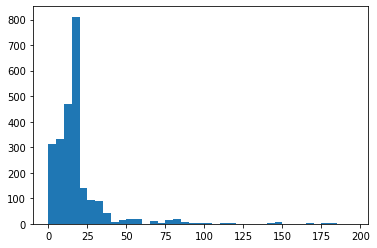

In [165]:
plt.hist(spanish['amount_spent'], bins=range(0,200,5))
plt.show()

#### Select all orders made in the month of August.

In [168]:
aug_orders = orders.loc[orders['month'] == 8]
aug_orders

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
199475,285421,561904,22075,2011,8,1,8,6 ribbons elegant christmas,96,2011-08-01 08:30:00,1.45,17941,United Kingdom,139.20
199476,285422,561904,85049E,2011,8,1,8,scandinavian reds ribbons,156,2011-08-01 08:30:00,1.06,17941,United Kingdom,165.36
199477,285423,561905,21385,2011,8,1,9,ivory hanging decoration heart,24,2011-08-01 09:31:00,0.85,14947,United Kingdom,20.40
199478,285424,561905,84970L,2011,8,1,9,single heart zinc t-light holder,12,2011-08-01 09:31:00,0.95,14947,United Kingdom,11.40
199479,285425,561905,84970S,2011,8,1,9,hanging heart zinc t-light holder,12,2011-08-01 09:31:00,0.85,14947,United Kingdom,10.20
199480,285426,561905,84978,2011,8,1,9,hanging heart jar t-light holder,12,2011-08-01 09:31:00,1.25,14947,United Kingdom,15.00
199481,285427,561905,21754,2011,8,1,9,home building block word,3,2011-08-01 09:31:00,5.95,14947,United Kingdom,17.85
199482,285428,561905,23226,2011,8,1,9,filigree heart daisy white,24,2011-08-01 09:31:00,1.25,14947,United Kingdom,30.00
199483,285429,561905,21715,2011,8,1,9,girls vintage tin seaside bucket,8,2011-08-01 09:31:00,2.55,14947,United Kingdom,20.40
199484,285430,561905,21716,2011,8,1,9,boys vintage tin seaside bucket,8,2011-08-01 09:31:00,2.55,14947,United Kingdom,20.40


#### Find the number of orders made by each country in the month of August.
**Hint**: Use value_counts().

In [176]:
aug_orders.groupby(['Country'])['InvoiceNo'].agg(['count']).sort_values('count', ascending=False)

,count
Country,
United Kingdom,23105
Germany,795
EIRE,593
France,569
Netherlands,280
Switzerland,267
Spain,252
Belgium,194
Israel,171


#### What's the  average amount of money spent by country?

In [177]:
aug_orders.groupby(['Country'])['amount_spent'].agg(['mean']).sort_values('mean', ascending=False)

,mean
Country,
Australia,210.179439
Netherlands,144.027893
Sweden,35.021500
Channel Islands,34.977000
Portugal,29.790244
EIRE,28.612782
Israel,28.501813
Iceland,26.586818
Norway,26.309221


#### What's the most expensive item?

In [185]:
most_expensive = orders.loc[orders['UnitPrice'] == orders['UnitPrice'].max()]
most_expensive

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
118352,173382,551697,POST,2011,5,2,13,postage,1,2011-05-03 13:46:00,8142.75,16029,United Kingdom,8142.75


#### What is the average amount spent per year?